In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pickle
import warnings
import math
from IPython.display import Image,display,HTML

pd.options.display.max_columns=100
plt.style.use('ggplot')
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\berid\python\csv_files\google play reviews.csv")

In [3]:
df.sample(2)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
7605,4d40029d-0d2a-47db-971e-e20beee0df28,Um usuário do Google,https://play-lh.googleusercontent.com/EGemoI2N...,O serviço faz bem o que deve fazer... Pegar e ...,3,0,5.42.20191107-7299,2019-11-14 15:15:56,Olá! Obrigado pelo feedback! Nos ajuda a pensa...,2019-11-17 13:31:02,5.42.20191107-7299,most_relevant,com.grability.rappi
5246,8467093c-88a6-449c-b7ce-fad60381b584,Geise Caren,https://play-lh.googleusercontent.com/a-/ACB-R...,"Gostei da proposta do aplicativo, principalmen...",3,222,1.2.50,2020-11-29 00:02:53,NaN,NaN,1.2.50,most_relevant,com.xiaojukeji.didi.brazil.customer


In [4]:
df['at']=pd.to_datetime(df['at']).dt.date.apply(pd.to_datetime)

In [5]:
df.isna().mean()*100

reviewId                 0.000000
userName                 0.000000
userImage                0.000000
content                  0.000000
score                    0.000000
thumbsUpCount            0.000000
reviewCreatedVersion     8.462963
at                       0.000000
replyContent            77.759259
repliedAt               77.759259
appVersion               8.462963
sortOrder                0.000000
appId                    0.000000
dtype: float64

##### Translate Non-English Text into English

In [6]:
from googletrans import Translator
from langdetect import detect

translator = Translator()

comments_in_english=[]

def translate_to_english(text):
    try:
        original_lang = detect(text) 
        if original_lang != 'en':  
            translation = translator.translate(text, dest='en')  
            comments_in_english.append(translation.text)
        else:
            comments_in_english.append(text)
    except:
        comments_in_english.append(None)
        
#Translator().translate(text,dest='en') if detect(text)!='en' else text

In [ ]:
%%time

#comments_in_english = []
total = len(df['content'])
progress_step = int(total / 100)


for i, comment in enumerate(df['content']):
    translate_to_english(comment)
    if (i + 1) % progress_step == 0:
        progress = int((i + 1) / total * 100)
        print(f"Progress: {progress}%")

In [ ]:
pickle.dump(comments_in_english,open('comments_in_english_small.pickle','wb'))

In [ ]:
data=pickle.load(open('comments_in_english.pickle','rb'))

In [7]:
comments_in_english=pickle.load(open('comments_in_english.pickle','rb'))

df=df.drop(columns='content')
df['content_En']=comments_in_english

In [8]:
df

,reviewId,userName,userImage,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId,content_En
0,f124c390-90c3-4153-9ca1-8e80c0f30a2c,Nathalia Dal Bello,https://play-lh.googleusercontent.com/a-/ACB-R...,1,3753,9.190.0,2023-01-23,NaN,NaN,9.190.0,most_relevant,br.com.brainweb.ifood,"The app was great, the discounts were great. B..."
1,ce308907-5ebe-493e-b87a-0a12e0f4c1c5,Kenzo Osanai,https://play-lh.googleusercontent.com/a-/ACB-R...,1,1452,9.191.0,2023-01-31,NaN,NaN,9.191.0,most_relevant,br.com.brainweb.ifood,Worst support experience I've had with an app....
2,0dc5a70e-8d04-4b5e-84b3-e1bcb922557b,Silvia Miranda,https://play-lh.googleusercontent.com/a-/ACB-R...,1,12,9.204.0,2023-05-03,NaN,NaN,9.204.0,most_relevant,br.com.brainweb.ifood,It doesn't solve the filter problem. Filter to...
3,accff4a0-f70e-485a-a85d-04fe3a2e7238,Bárbara Figueiredo,https://play-lh.googleusercontent.com/a-/ACB-R...,1,63,9.204.0,2023-05-01,NaN,NaN,9.204.0,most_relevant,br.com.brainweb.ifood,"85% of purchases arrive wrong, incomplete or w..."
4,ec2fc975-0f38-4c2e-81c1-7b9dc7398faf,Pedro Renhe,https://play-lh.googleusercontent.com/a/AGNmyx...,1,37,9.202.1,2023-04-17,NaN,NaN,9.202.1,most_relevant,br.com.brainweb.ifood,"The app was already better, had more coupons a..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10795,defc74c6-d22a-4fc8-b8e1-6dee69e61355,Rogério Cattaneo,https://play-lh.googleusercontent.com/a/AGNmyx...,5,0,9.0.3,2023-04-25,NaN,NaN,9.0.3,newest,com.vanuatu.aiqfome,Great
10796,95f2a8a4-b014-44bd-89ad-e625a882d222,Joaquim Sagioneti,https://play-lh.googleusercontent.com/a-/ACB-R...,5,0,9.0.3,2023-04-25,NaN,NaN,9.0.3,newest,com.vanuatu.aiqfome,great app
10797,ff88dbd0-0316-4c3c-81c7-adc1dc92ae77,Conta Edits,https://play-lh.googleusercontent.com/a/AGNmyx...,5,0,9.0.3,2023-04-25,NaN,NaN,9.0.3,newest,com.vanuatu.aiqfome,"Very practical and easy to use, the only defec..."
10798,289d04bc-c392-4261-8a33-b953ea992238,Thomas Magnum,https://play-lh.googleusercontent.com/a-/ACB-R...,5,0,NaN,2023-04-25,NaN,NaN,NaN,newest,com.vanuatu.aiqfome,Very good app.


##### Sentiment Analysis 

In [9]:
import nltk

from nltk.sentiment import SentimentIntensityAnalyzer
sia=SentimentIntensityAnalyzer()

from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

from nltk.corpus import stopwords
stopwords=stopwords.words('english')

In [10]:
def comment_sentiment_scores(comment):
    comment_tokenized=nltk.word_tokenize(comment)
    comment_lowered=[w.lower() for w in comment_tokenized]
    comment_lemmatized=[lemmatizer.lemmatize(w) for w in comment_lowered]
    comment_filtered=[w for w in comment_lemmatized if w not in stopwords]
    final_comment=' '.join(comment_filtered)
    
    score=sia.polarity_scores(final_comment)
    return score

In [11]:
%%time

scores = []

for i,comment in enumerate(df['content_En']):
    try:
        scores.append(comment_sentiment_scores(comment))
    except:
        scores.append(None)

    if (i + 1) % int(len(df['content_En'])/100)==0:
        print(f"Progress: {i + 1}/{len(df['content_En'])}")

Progress: 108/10800
Progress: 216/10800
Progress: 324/10800
Progress: 432/10800
Progress: 540/10800
Progress: 648/10800
Progress: 756/10800
Progress: 864/10800
Progress: 972/10800
Progress: 1080/10800
Progress: 1188/10800
Progress: 1296/10800
Progress: 1404/10800
Progress: 1512/10800
Progress: 1620/10800
Progress: 1728/10800
Progress: 1836/10800
Progress: 1944/10800
Progress: 2052/10800
Progress: 2160/10800
Progress: 2268/10800
Progress: 2376/10800
Progress: 2484/10800
Progress: 2592/10800
Progress: 2700/10800
Progress: 2808/10800
Progress: 2916/10800
Progress: 3024/10800
Progress: 3132/10800
Progress: 3240/10800
Progress: 3348/10800
Progress: 3456/10800
Progress: 3564/10800
Progress: 3672/10800
Progress: 3780/10800
Progress: 3888/10800
Progress: 3996/10800
Progress: 4104/10800
Progress: 4212/10800
Progress: 4320/10800
Progress: 4428/10800
Progress: 4536/10800
Progress: 4644/10800
Progress: 4752/10800
Progress: 4860/10800
Progress: 4968/10800
Progress: 5076/10800
Progress: 5184/10800
P

In [12]:
df['Sentiment Scores']=scores

In [13]:
df['Positive Score']=df['Sentiment Scores'].apply(lambda x:x['pos'] if x is not None else x)
df['Negative Score']=df['Sentiment Scores'].apply(lambda x:x['neg'] if x is not None else x)
df['Compound Score']=df['Sentiment Scores'].apply(lambda x:x['compound'] if x is not None else x)

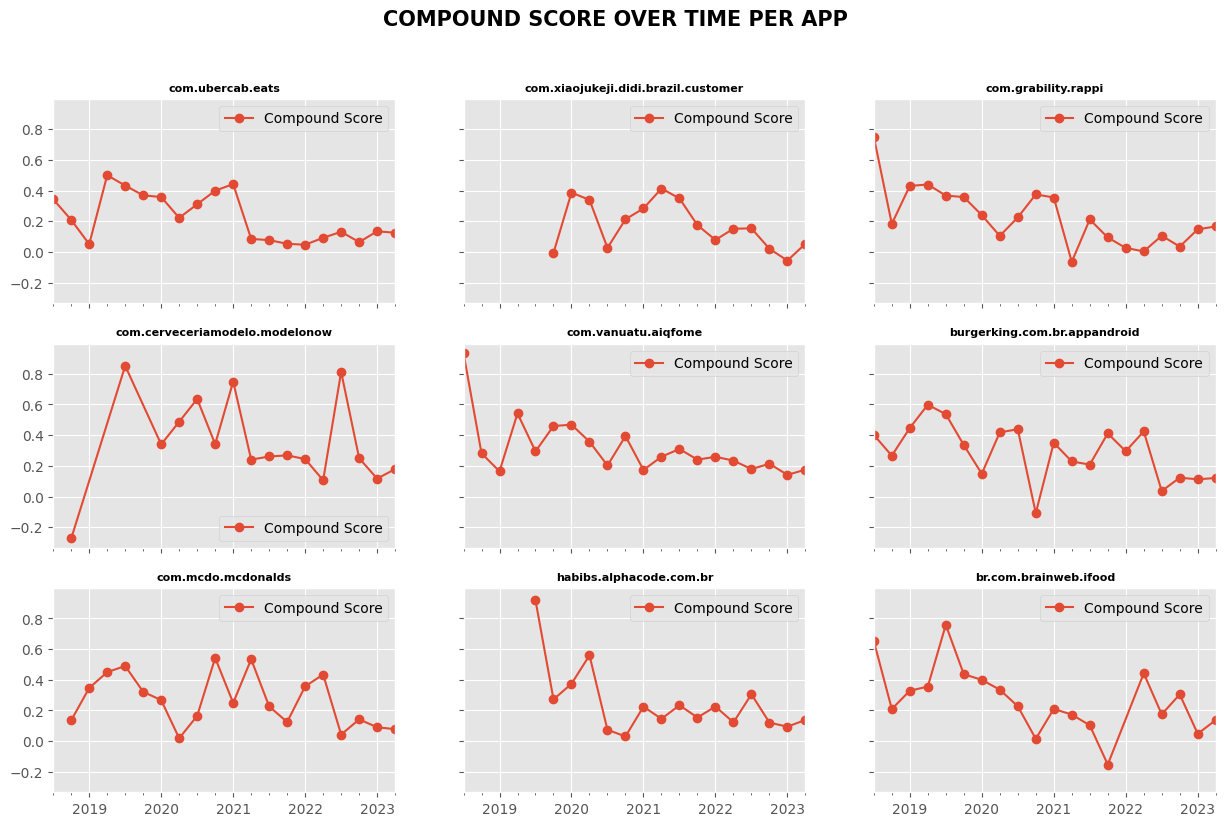

In [19]:
g=df.groupby(['appId',df['at'].dt.to_period('Q')])['Compound Score'].mean().sort_index(level=[0,1])

app_ids=list(set([i[0] for i in g.index]))
fig,axes=plt.subplots(3,3,figsize=(15,9),sharex=True,sharey=True)

for app_id,ax in zip(app_ids,axes.ravel()):
    f = g[g.index.get_level_values(0) == app_id]
    f.reset_index().plot.line(ax=ax,x='at',y='Compound Score',marker='o')
    ax.set_title(app_id,fontweight='bold',size=8)
    ax.set_xlabel('')

plt.suptitle('COMPOUND SCORE OVER TIME PER APP',fontweight='bold',size=15)
plt.show()

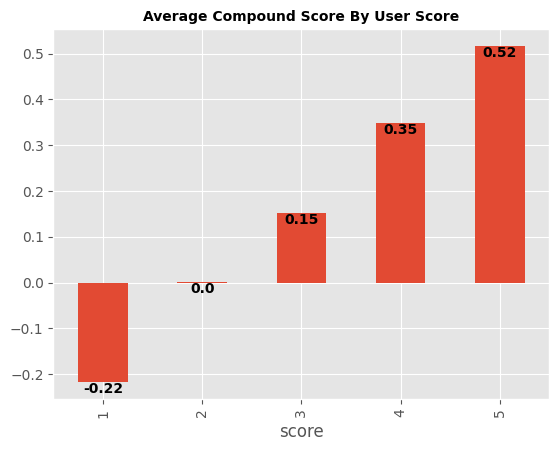

In [15]:
g=df.groupby('score')['Compound Score'].mean()

g.plot.bar()
plt.title('Average Compound Score By User Score',fontweight='bold',size=10)
for i in range(len(g)):
    plt.text(i,g.values[i],g.values[i].round(2),fontweight='bold',ha='center',va='top')

In [16]:
# average positive score by app version

g=df.groupby(['appId','reviewCreatedVersion']).filter(lambda x:x['content_En'].count()>30)\
.groupby(['appId','reviewCreatedVersion']).agg({'Positive Score':'mean'}).sort_index(level=[0,1])

g.style.background_gradient(cmap='Reds').to_html('g.html')
g_html = open('g.html', 'r').read()
display(HTML(g_html))